In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [66]:
np.random.seed(42)


## Ejercicio 1

Considere los datos `Auto` del paquete `ISLR2`.

1. Cree una variable binaria, `mpg01`, que contenga un $1$ si `mpg` contiene
un valor por encima de su mediana, y un $0$ si `mpg` contiene un valor por debajo de su mediana.
2. Explore los datos gráficamente (dispersión y boxplot) para investigar la asociación entre mpg01 y las otras características. ¿Qué variables parecen útiles para predecir `mpg01`? 
3. Divida los datos en un conjunto de entrenamiento y un conjunto de test.
4. Realice una regresión logística sobre los datos de entrenamiento para predecir `mpg01` utilizando las variables que parezcan estar más asociadas a
`mpg01`. ¿Cuál es el error de test del modelo obtenido?
5. Aplique el método de vecinos más cercanos KNN sobre los datos de entrenamiento, con varios valores de $K$ (por ejemplo $1$, $10$ y $50$), para predecir `mpg01`. Utilice sólo las variables que parezcan más
asociadas con `mpg01` en (2). ¿Qué errores de test obtiene? ¿Qué valor de $K$ parece funcionar mejor en este conjunto de datos?

In [232]:
df = pd.read_csv("Auto.csv")
df.head(),df.shape

(    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
 0  18.0          8         307.0         130    3504          12.0    70   
 1  15.0          8         350.0         165    3693          11.5    70   
 2  18.0          8         318.0         150    3436          11.0    70   
 3  16.0          8         304.0         150    3433          12.0    70   
 4  17.0          8         302.0         140    3449          10.5    70   
 
    origin                       name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  
 3       1              amc rebel sst  
 4       1                ford torino  ,
 (392, 9))

#### 1-

In [233]:
from statistics import median
mediana = median(df["mpg"])
df["mpg01"] = np.where(df["mpg"]>mediana,1,0)
df.mpg01.value_counts()

0    196
1    196
Name: mpg01, dtype: int64

#### 2-

In [234]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

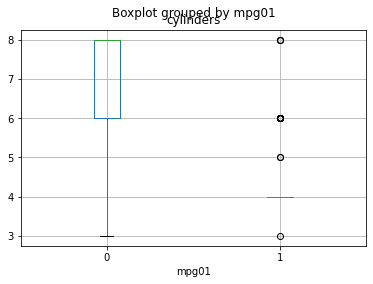

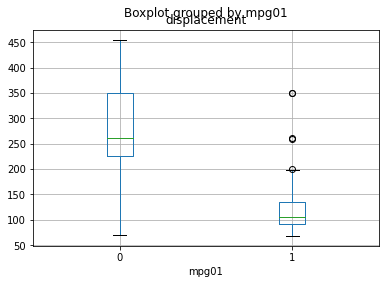

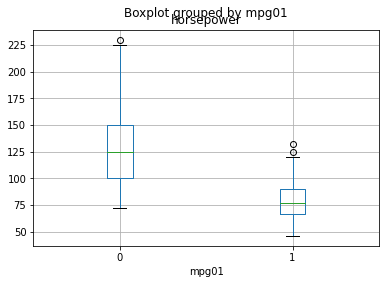

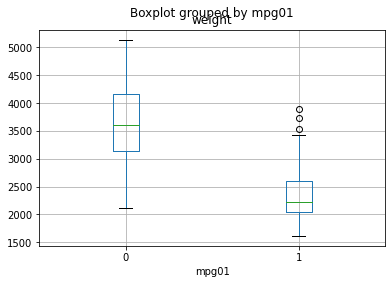

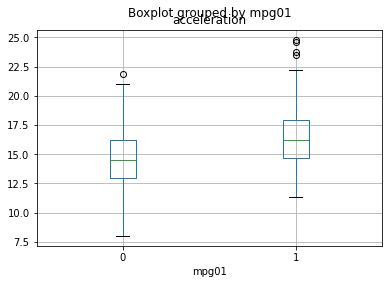

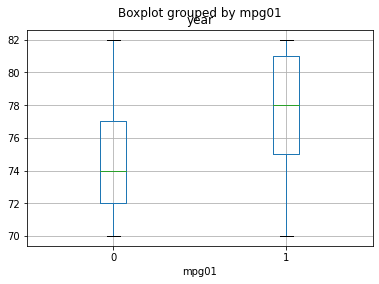

In [235]:
for x in lista:
    df.boxplot(x,by="mpg01")


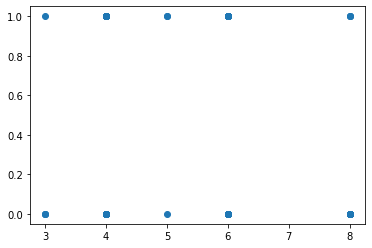

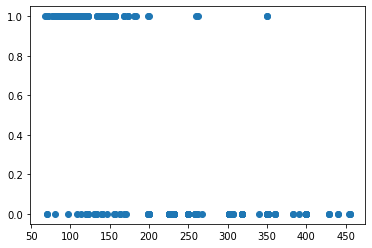

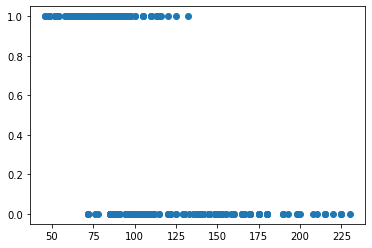

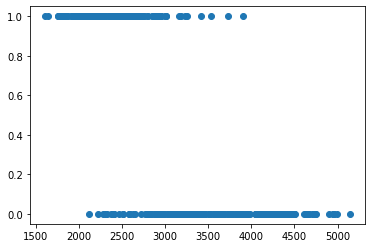

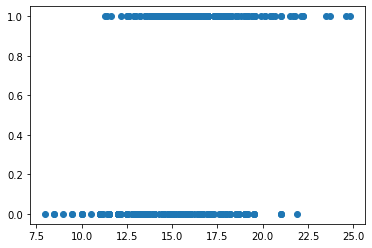

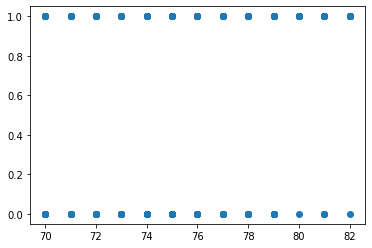

In [236]:
for x in lista:
    plt.scatter(df[x],df["mpg01"])
    plt.show()

Mirando los diagramas pareciera ser que las primeras tres variables displacement,cylinders y horsepower son las variables que mas estan segmentando al target. Si bien este analisis es univariado nos puede dar una idea de la importancia de un feature en un modelo predictivo, pero nada dice del comportamiento conjunto a la hora de entrenar un modelo

#### 3-

In [237]:
X_train, X_test, y_train, y_test = train_test_split(df[["cylinders", "displacement", "horsepower"]], df["mpg01"], test_size=0.5, random_state=42)


In [238]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
    
pred_proba = clf.predict_proba(X_test)
pred_clase = clf.predict(X_test)


Como medida de error voy a utilizar el 1-accuracy que no es mas que fijarse a cuantos le pegamos y calcular un promedio y voy a usar el punto de corte que eligio sklearn para clasificar como 1 o 0, esto podria cambiarse mirando el vector pred_proba y hacer una curva de accuracy,precision, recall y ver como evolocionan en funcion del punto de corte lo cual para un problema orientado a negocio es recomendable, ya que muchas veces es mas importante pegarle a los 1 que a los 0s o viceversa

In [239]:

1-(pred_clase==y_test).value_counts()[1]/((pred_clase==y_test).value_counts()[0]+(pred_clase==y_test).value_counts()[1])

0.1377551020408163

#### 4-

Me creo una funcion que calcule el accuracy porque voy a tener que usarla varias veces para distintos valores de k

In [240]:
from sklearn.neighbors import KNeighborsClassifier

def accuracy(pred, truth):
    return np.mean(pred == truth)

Text(0.5, 1.0, 'ACC')

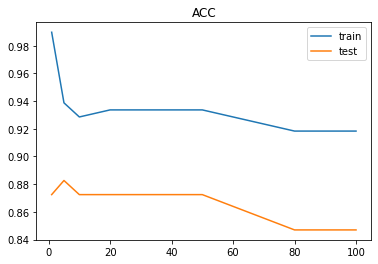

In [241]:
ks = [1,5,10,20,50,80,100]
acc_train = []
acc_test = []
for h in ks:
    clf = KNeighborsClassifier(n_neighbors=h)
    clf.fit(X_train, y_train)
    acks_train = accuracy(clf.predict(X_train),y_train)
    acks_test = accuracy(clf.predict(X_test),y_test)
    acc_train.append(acks_train)
    acc_test.append(acks_test)
    
plt.plot(ks,acc_train,label="train")
plt.plot(ks,acc_test,label="test")
plt.legend(["train","test"])
plt.title("ACC")

Mirando el grafico perdemos valor de accuracy en train cuando nos pasamos de un vecino y a medida que nos pasamos de 50 vecinos. El acc en train y test se encuentran bastante separados, esto podria deberse a un problema de overfit, pero hay q tener en cuenta que el data set tiene muy pocas observaciones

## Ejercicio 2

Supongamos que para estimar los coeficientes de un modelo de regresión lineal minimizamos:

$$ \sum_{i=1}^n \left (y_i-\beta_0-\sum_{j=1}^p \beta_j x_{ij} \right )^2 \quad \text{sujeto a } \sum_{j=1}^p |\beta_j| \leq s$$
 para un valor particular de $s$. 

1. ¿A qué técnica vista en clase corresponde la ecuación anterior?

2. Indique cuál de las siguientes afirmaciones es correcta y justifique.

* El $RSS$ para el conjunto de **entrenamiento**, cuando aumentamos $s$ desde $0$ en adelante:  
  1. aumenta inicialmente, y luego disminuye (en forma de U invertida).
  2. disminuye inicialmente, y luego aumenta (en forma de U).
  3. es creciente.
  4. es decreciente.
  5. es constante.
* Responda la pregunta anterior para el $RSS$ del conjunto de **test**.

#### 1-
Es un modelo de regresion lasso

#### 3- 

Opcion B, en el conjunto de training tiene forma de U, disminuye y vuelve a subir

#### 4-
Opcion B

## Ejercicio 3

Considere el conjunto de datos `OJ` del paquete `ISLR2`:

1. Cree un conjunto de entrenamiento que contenga una muestra aleatoria de $800$ observaciones, y un conjunto de test que contenga las restantes.
2. Ajuste un árbol a los datos de entrenamiento, con `Purchase` como respuesta
y las demás variables como predictores. Utilice la función `summary()` para producir estadísticos de resumen sobre el árbol, y describa los resultados obtenidos. ¿Cuál es el error de entrenamiento? ¿Cuántos nodos terminales tiene el árbol?
3. Escriba en la consola de `R` el nombre del objeto donde guardó los resultados del ajuste anterior para obtener una salida de texto detallado. Elija uno de los nodos terminales e interprete la información mostrada.
4. Haga un gráfico del árbol e interprete los resultados.
5. Prediga la respuesta para los datos de test, y calcule la matriz de  confusión correspondiente. ¿Cuál es el error de test? 
6. Aplique la función `cv.tree()` al conjunto de entrenamiento para determinar el tamaño óptimo del árbol.
7. Elabore un gráfico con el tamaño del árbol en el eje x y el error de validación cruzada en el eje y. ¿Qué tamaño de árbol corresponde al menor error de validación cruzada?
9. Produzca un árbol podado correspondiente al tamaño de árbol óptimo
obtenido mediante validación cruzada. Si la validación cruzada no conduce
a la selección de un árbol podado, entonces ajuste un árbol podado con cinco
nodos terminales.
10. Compare los errores de entrenamiento entre los árboles podados y los no podados. ¿Cuál es mayor?
11. Repita el inciso anterior para el error de test. ¿Cuál es mayor?


In [83]:
df = pd.read_csv("OJ.csv")
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [84]:
df.shape[0]-800

270

In [87]:
df["Store7"] = np.where(df["Store7"]=="Yes",1,0)
df["target"] = np.where(df["Purchase"]=="CH",1,0)
df = df.drop(columns="Purchase")
df.target.value_counts()

1    653
0    417
Name: target, dtype: int64

In [88]:
df_train,df_test = train_test_split(df, test_size=270, random_state=42)


In [89]:
X_train = df_train.drop(columns="target")
y_train = df_train["target"]
X_test = df_test.drop(columns="target")
y_test = df_test["target"]

In [90]:
from sklearn.tree import DecisionTreeClassifier

### 2-3-4

In [146]:
clf_sin_poda = tree.DecisionTreeClassifier(max_leaf_nodes=7,max_depth=2,random_state=42).fit(X_train, y_train)
clf_sin_poda

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=7, random_state=42)

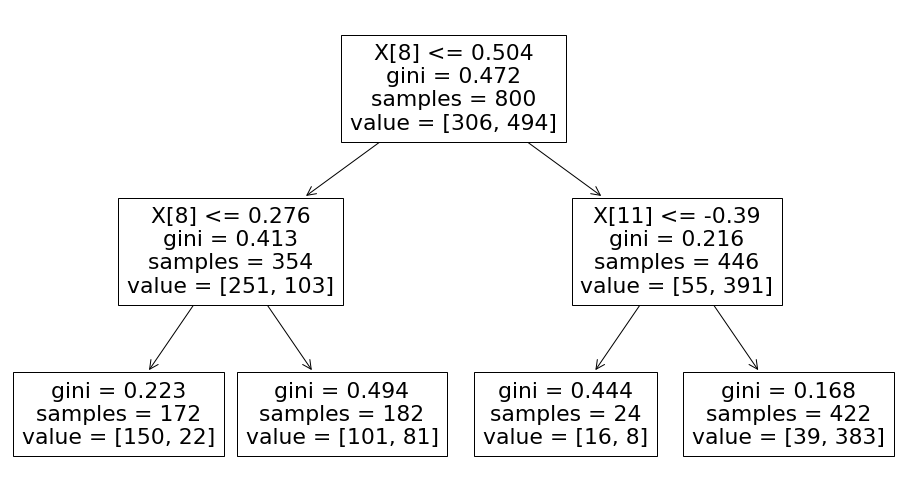

In [147]:
plt.figure(figsize=(16, 9))
tree.plot_tree(clf_sin_poda)
plt.show()

Calculo el 1-accuracy en training

In [148]:
pred = clf_sin_poda.predict(X_train)
print("error train",1-accuracy(pred,y_train))

error train 0.1875


#### 5-

In [149]:
pred = clf_sin_poda.predict(X_test)
print("error test",1-accuracy(pred,y_test))

error test 0.20370370370370372


In [99]:
from sklearn.metrics import confusion_matrix


Calculo la matriz de confusion como asi tambien los tn,fp,fn,tp que sirven para calcular otras metricas tambien

In [105]:
tn, fp, fn, tp = confusion_matrix(pred,y_test).ravel()
print(confusion_matrix(pred,y_test)),print([tn, fp, fn, tp])

[[ 69  16]
 [ 42 143]]
[69, 16, 42, 143]


(None, None)

#### 6-7

In [106]:
from sklearn.model_selection import cross_validate


Voy a usar como hiperparametro el max_depth, la idea es hacer una validacion cruzada para distintos valores de max_depth, luego hacer un promedio de la metrica accuracy en cada instancia y tener un valor promedio de accuracy para cada max_depth

In [122]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,15,20,40,50]
acc = []
scoring = ['accuracy']

for x in max_depth_list:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=7,max_depth=x,random_state=42,).fit(X_train, y_train)
    scores = cross_validate(clf, X_train, y_train, scoring=scoring,cv=5)
    acc_mean = scores["test_accuracy"].mean()
    acc.append(acc_mean)

In [124]:
max_depth_list,acc

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 40, 50],
 [0.7962499999999999,
  0.8012499999999999,
  0.8237499999999999,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125,
  0.83125])

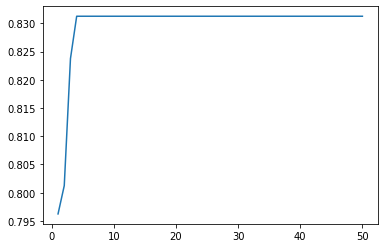

In [123]:
plt.plot(max_depth_list,acc)

Vemos que con max_depth = 4 se alcanza el valor maximo de accuracy

#### 8-

En mi caso se ve que con un max_depth=4 ya tenemos un arbol podado para evitar el sobre ajuste, vamos a entrenar y hacer el grafico correspondiente

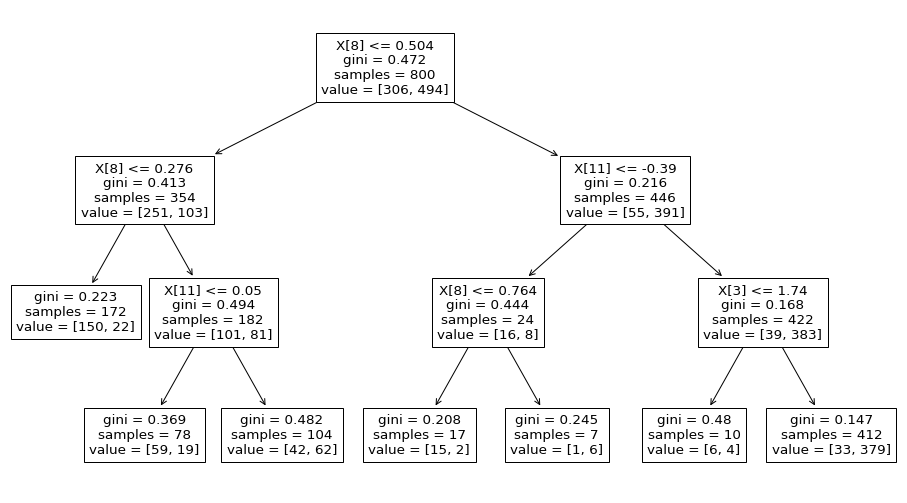

In [150]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7,max_depth=4,random_state=42).fit(X_train, y_train)

plt.figure(figsize=(16, 9))
tree.plot_tree(clf)
plt.show()

### 9-10

En este caso seguimos tomando como medida de error 1-accuracy como lo hicimos antes, vamos a calcularlo para test y train

In [151]:
pred = clf_sin_poda.predict(X_train)
print("error train sin poda:",np.round(1-accuracy(pred,y_train),4))

pred = clf_sin_poda.predict(X_test)
print("error test sin poda:",np.round(1-accuracy(pred,y_test),4))

pred = clf.predict(X_train)
print("error train con poda:",np.round(1-accuracy(pred,y_train),4))

pred = clf.predict(X_test)
print("error test con poda:",np.round(1-accuracy(pred,y_test),4))




error train sin poda: 0.1875
error test sin poda: 0.2037
error train con poda: 0.1538
error test con poda: 0.2148


Habria que estudiar con cuidado estos resultados o bien evaluar otra clase de metrica para entender por que el error de testing con poda es un poco mayor. Recordando siempre que estamos tomando por defecto el punto de corte propuesto y un set de datos bastante chico

## Ejercicio 4

A continuación, exploramos el clasificador de margen maximal en un conjunto de datos.

1. Nos dan $n = 7$ observaciones en $p = 2$ dimensiones. Para cada
observación, hay una etiqueta de clase asociada.

|obs | $X_1$ |$X_2$ |$Y$|
|------|------|---|---|
|1   | 3  |4  |Rojo|
|2   | 2  |2  |Rojo|
|3   | 4  |4  |Rojo|
|4   | 1  |4  |Rojo|
|5   | 2  |1  |Azul|
|6   | 4  |3  |Azul|
|7   | 4  |1  |Azul|

2. Dibuje las observaciones junto con el hiperplano de separación óptimo y proporcione su ecuación.
3. Describa la regla de clasificación para el clasificador de margen maximal. Debería ser algo del estilo a:

 "clasificar en Rojo si $\beta_0 +  \beta_1 x_1 + \beta_2 x_2 > 0$, y clasificar en Azul en caso contrario".

¿Qué valores toman $\beta_0$, $\beta_1$ y $\beta_2$?
4. En su dibujo, indique el margen para el hiperplano de margen maximal e indique los vectores de soporte para el clasificador de margen maximal
5. Argumente que un pequeño cambio de la séptima observación no afectaría al hiperplano de margen maximal.
6. Dibuje un hiperplano que no sea el hiperplano de separación óptimo, y proporcione la ecuación para este hiperplano. 
7. Dibuje una observación adicional en el gráfico de modo que las dos
clases ya no sean separables por un hiperplano.

* Obs: cargue el data set con una variable y que vale 1 si el color es rojo y 0 si es azul

In [159]:
df = pd.read_excel("input_ej4.xlsx")
df

,x1,x2,y
0,3,4,1
1,2,2,1
2,4,4,1
3,1,4,1
4,2,1,0
5,4,3,0
6,4,1,0


### 2,3,4

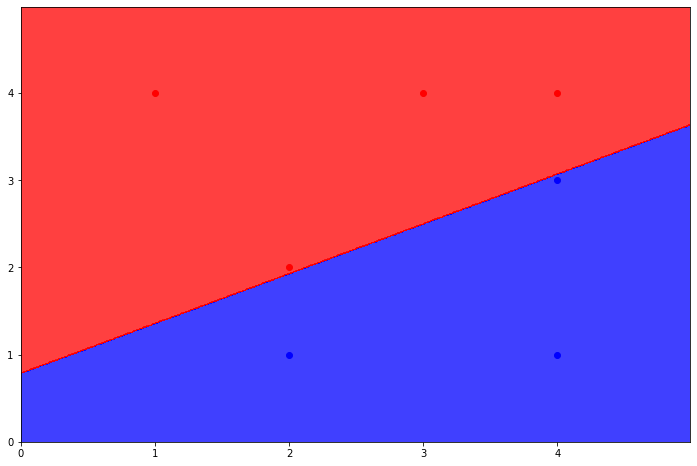

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from fitter import Fitter, get_common_distributions, get_distributions
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC


X = df[["x1","x2"]].values
Y = df["y"].values


X_train = X
y_train = Y


clf = SVC(kernel='linear', random_state=0)    
clf.fit(X_train, y_train)


from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('blue', 'red'))(i)], label = j)
plt.show()


#### Coeficientes y vectores de soporte

In [197]:
b0 = clf.intercept_
b1,b2 = clf.coef_[0]

print("valores de coeficientes:",b0,b1,b2)
print("vectores de soporte:",clf.support_vectors_)

valores de coeficientes: [-0.84615385] -0.6153846153846154 1.076923076923077
vectores de soporte: [[2. 1.]
 [4. 3.]
 [2. 2.]
 [4. 4.]]


##### Regla de decision



"clasificar en Rojo si $-0.84 -0.61 x_1 + 1.07 x_2 > 0$, y clasificar en Azul en caso contrario"

### 5-

Mirando el grafico del hiperplano separador se ve que el punto se encuentra alejado del hiperplano, por lo cual un pequeño cambio no tendria grandes cambios en la pendiente

### 6-

Para dibujar un hiperplano de separador no optimo elijo usar una regresion logistica que se que usa un plano para separar clases

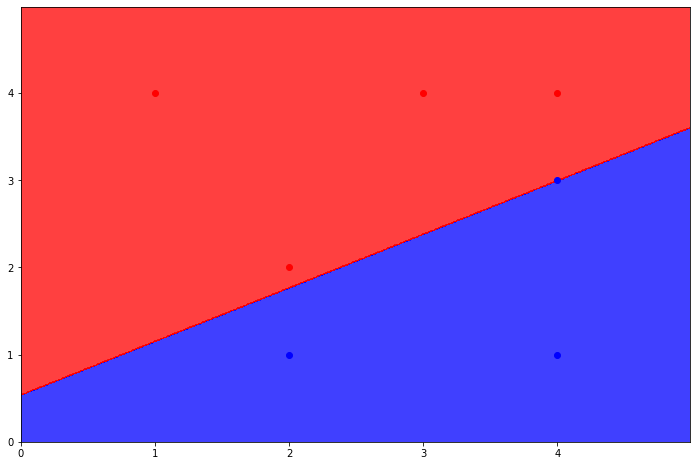

In [205]:
X = df[["x1","x2"]].values
Y = df["y"].values


X_train = X
y_train = Y


clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)


from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('blue', 'red'))(i)], label = j)
plt.show()


In [203]:
b0 = clf.intercept_
b1,b2 = clf.coef_[0]

print("valores de coeficientes:",b0,b1,b2)

valores de coeficientes: [-0.51658373] -0.5937456161734421 0.9653772782642385


Ecuacion para el nuevo hiperplano y regla de decision

"clasificar en Rojo si $-0.51 - 0.59 x_1 + 0.96 x_2 > 0$, y clasificar en Azul en caso contrario"

### 7-

Para dibujar una observaciono que no quede separable por el hiperplano optimo basta elegir cualquiera que ensucie esa linea de separacion ya ajustada, por ejemplo un punto podria ser

* (1,3,0)

Donde 0 corresponde a azul

En este caso vuelvo a dibujar el hiperplano separador optimo y marco en verde el punto (1,3,0) que el hiperplano construido de esta forma no podria separar

C:\Users\Dell7400\AppData\Local\Temp/ipykernel_44528/255718470.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(1, 3, "or",color="green")


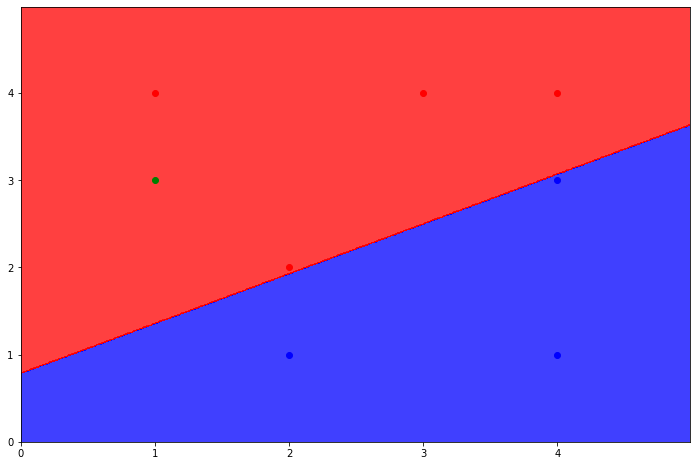

In [222]:
plt.figure(figsize=(12,8))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    scat = plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('blue', 'red'))(i)], label = j)

plt.plot(1, 3, "or",color="green")
plt.show()

